In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader import data as pdr

In [4]:
from datetime import datetime
import yfinance as yf
yf.pdr_override() 

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [8]:
import yfinance as yf
yf.pdr_override() 

for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889557,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.207794,77034200
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.374802,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.657639,89113600
...,...,...,...,...,...,...
2023-12-21,196.100006,197.080002,193.500000,194.679993,194.679993,46482500
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300


In [10]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,171.652143,173.259682,170.376190,171.945635,171.512637,5.951910e+07
std,18.036729,17.776801,18.057391,17.867214,18.039511,1.781844e+07
min,126.010002,127.769997,124.169998,125.019997,124.325081,2.404830e+07
25%,160.900002,162.052498,159.672501,160.640003,159.990993,4.808845e+07
50%,174.945007,176.660004,173.660004,175.294998,174.871323,5.547430e+07
75%,186.099998,187.900005,184.807503,186.759995,186.425522,6.608052e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.543573e+08


<AxesSubplot:xlabel='Date'>

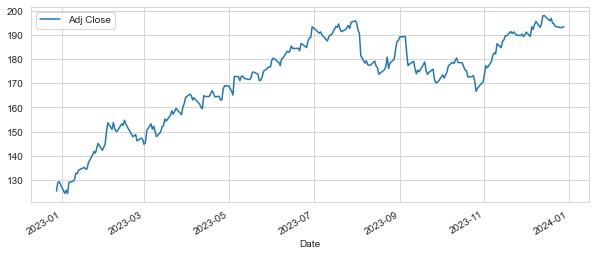

In [11]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

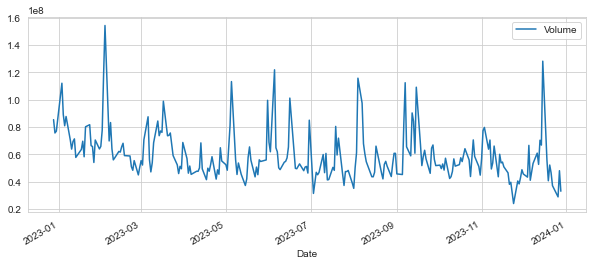

In [12]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [13]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = DataFrame.rolling(AAPL['Adj Close'],ma).mean()

In [14]:
AAPL

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400,NaN,NaN,NaN
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889557,75703700,NaN,NaN,NaN
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.207794,77034200,NaN,NaN,NaN
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.374802,112117500,NaN,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.657639,89113600,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-21,196.100006,197.080002,193.500000,194.679993,194.679993,46482500,195.958002,193.487000,185.043958
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800,195.747002,193.668501,185.306513
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300,195.734003,193.831501,185.595219


In [15]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']]

,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,
2022-12-28,125.339409,NaN,NaN,NaN
2022-12-29,128.889557,NaN,NaN,NaN
2022-12-30,129.207794,NaN,NaN,NaN
2023-01-03,124.374802,NaN,NaN,NaN
2023-01-04,125.657639,NaN,NaN,NaN
...,...,...,...,...
2023-12-21,194.679993,195.958002,193.487000,185.043958
2023-12-22,193.600006,195.747002,193.668501,185.306513
2023-12-26,193.050003,195.734003,193.831501,185.595219


<AxesSubplot:xlabel='Date'>

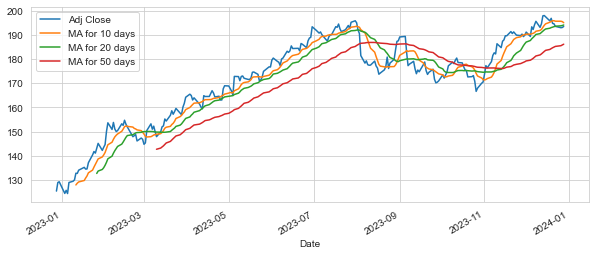

In [16]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

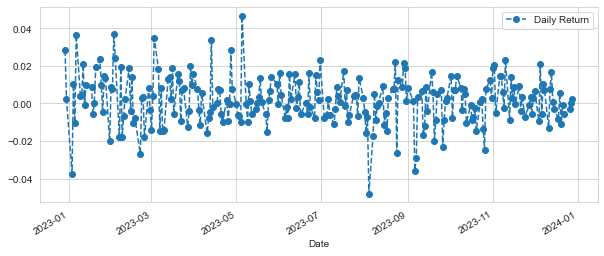

In [17]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

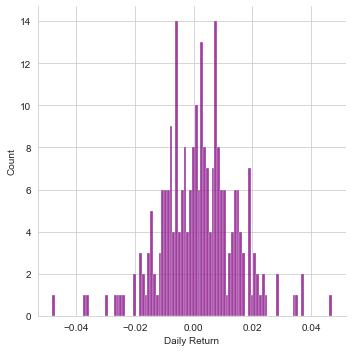

In [18]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

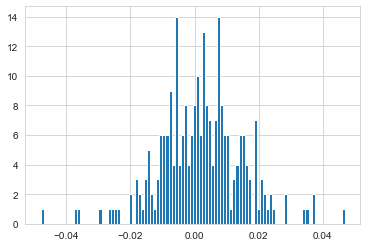

In [19]:
AAPL['Daily Return'].hist(bins=100)

In [20]:
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [21]:
closing_df

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-12-28,125.339409,81.820000,86.459999,232.468719
2022-12-29,128.889557,84.180000,88.949997,238.891769
2022-12-30,129.207794,84.000000,88.730003,237.712234
2023-01-03,124.374802,85.820000,89.699997,237.474319
2023-01-04,125.657639,85.139999,88.709999,227.086441
...,...,...,...,...
2023-12-21,194.679993,153.839996,141.800003,373.540009
2023-12-22,193.600006,153.419998,142.720001,374.579987
2023-12-26,193.050003,153.410004,142.820007,374.660004


In [22]:
tech_rets = closing_df.pct_change()

In [23]:
tech_rets

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-12-28,NaN,NaN,NaN,NaN
2022-12-29,0.028324,0.028844,0.028799,0.027630
2022-12-30,0.002469,-0.002138,-0.002473,-0.004938
2023-01-03,-0.037405,0.021667,0.010932,-0.001001
2023-01-04,0.010314,-0.007924,-0.011037,-0.043743
...,...,...,...,...
2023-12-21,-0.000770,0.011307,0.015323,0.007879
2023-12-22,-0.005547,-0.002730,0.006488,0.002784
2023-12-26,-0.002841,-0.000065,0.000701,0.000214


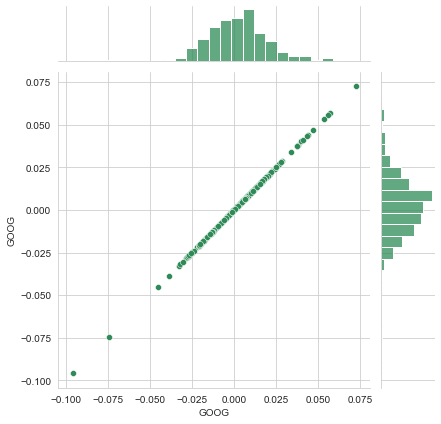

In [24]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

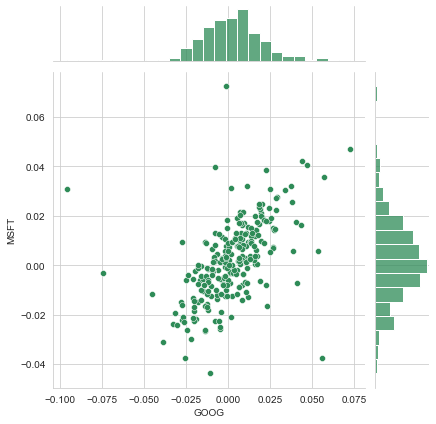

In [25]:
import scipy.stats as stats
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter',color='seagreen')

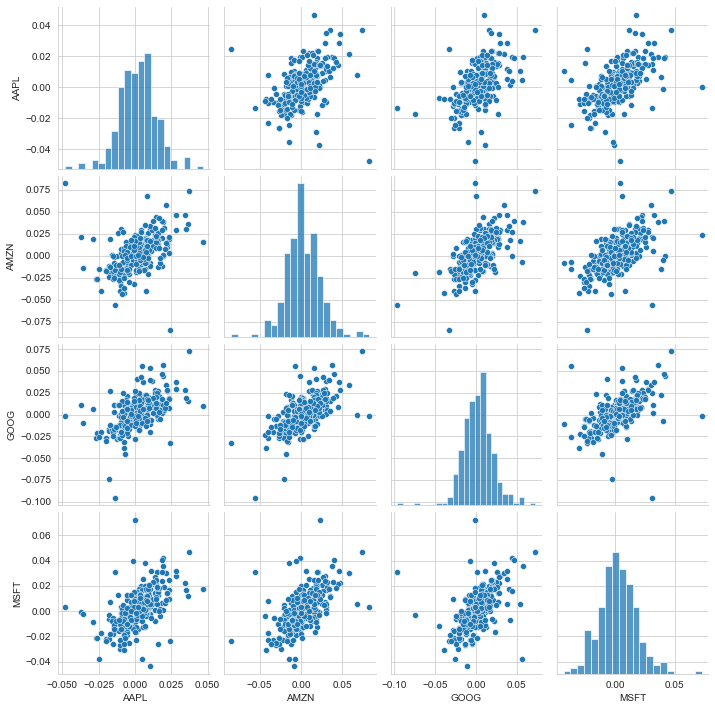

In [26]:
sns.pairplot(tech_rets.dropna())

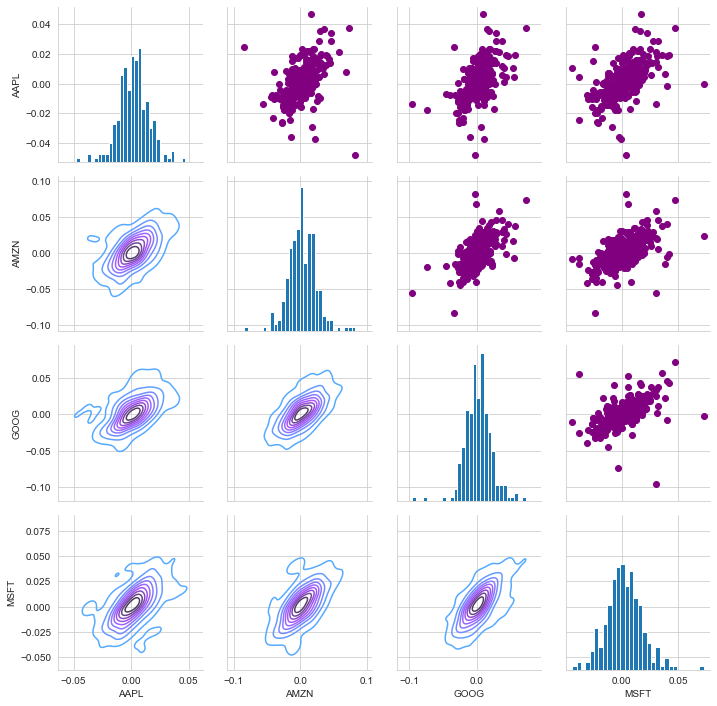

In [29]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

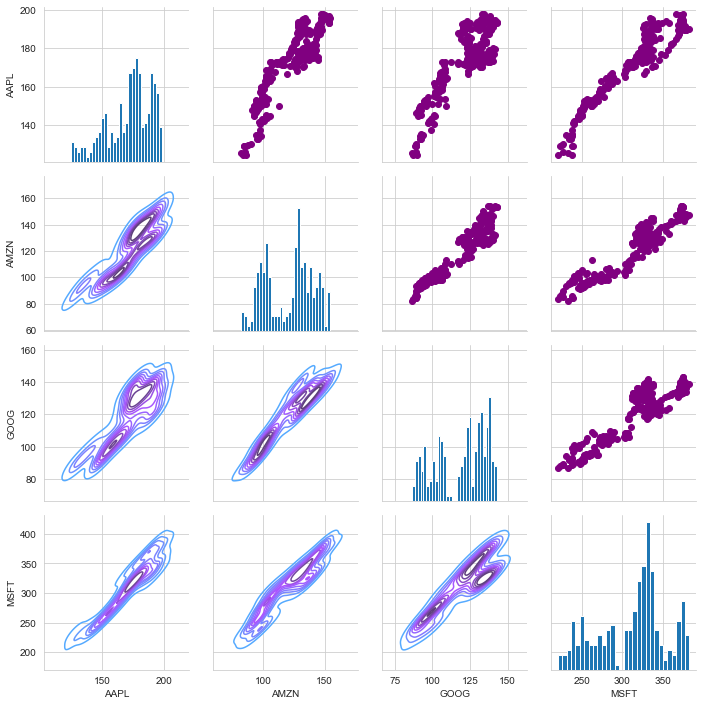

In [30]:
closing_fig = sns.PairGrid(closing_df)

closing_fig.map_upper(plt.scatter,color='purple')

closing_fig.map_lower(sns.kdeplot,cmap='cool_d')

closing_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:>

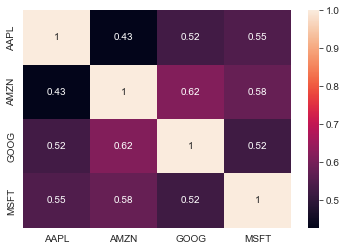

In [32]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

<AxesSubplot:>

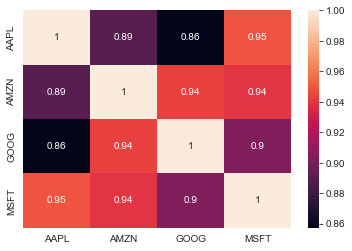

In [33]:
sns.heatmap(closing_df.corr(),annot=True)

In [34]:
rets = tech_rets.dropna()

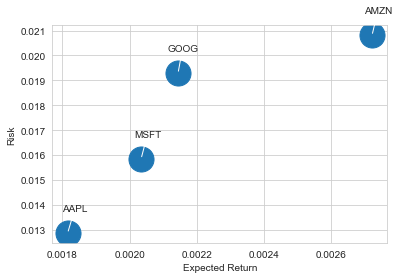

In [44]:
area = np.pi*200

plt.scatter(rets.mean(),rets.std(), s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.0'))

Text(0, 0.5, 'Risk')

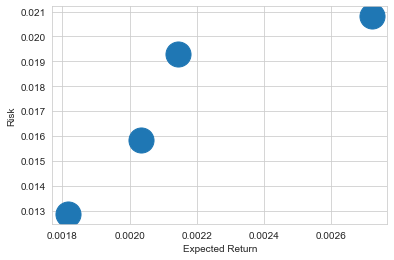

In [38]:
area = np.pi*200

plt.scatter(rets.mean(),rets.std(), s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

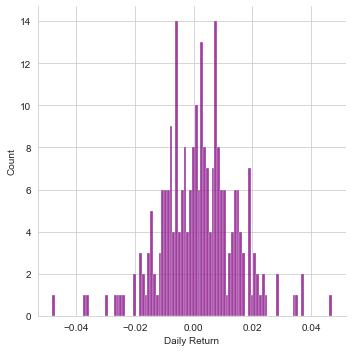

In [46]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [47]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-12-29,0.028324,0.028844,0.028799,0.027630
2022-12-30,0.002469,-0.002138,-0.002473,-0.004938
2023-01-03,-0.037405,0.021667,0.010932,-0.001001
2023-01-04,0.010314,-0.007924,-0.011037,-0.043743
2023-01-05,-0.010605,-0.023726,-0.021869,-0.029638


In [48]:
rets['AAPL'].quantile(0.05)

-0.01745327587217116

In [49]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [52]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

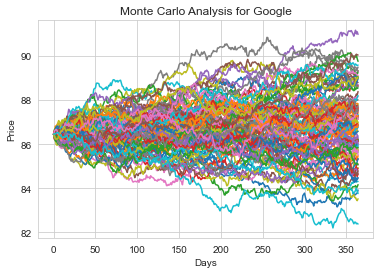

In [54]:
# Get start price from GOOG.head()
start_price = 86.45

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')